# **Pokemon Catch Them all**

## Objectives

* To determine which Pokemon wins the game by understanding which characteristics help them in a combat.

* The Kaggle dataset called "Pokemon with stats" and "Pokemon- Weedle's Cave", was used as raw data and saved under the raw folder, ["Pokemon with Stats" for "pokemon"]( https://www.kaggle.com/datasets/abcsds/pokemon/data) and ["Pokemon- Weedle's Cave" for "combats"]( https://www.kaggle.com/datasets/terminus7/pokemon-challenge?select=pokemon.csv).

## Inputs

* The input was "pokemon.csv" and "combats.csv"

## Outputs

* The output was "pokemon_cleaned.csv" 

## Additional Comments

* Two files were given, "pokemon.csv" has information on the Pokemon's characteristics and "combats.csv" are the results of a previous battle. This will be needed for the machine learning model to predict the winner and also to train the data.



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [2]:
import os
current_dir = os.getcwd()
print("Current working directory:", current_dir)

Current working directory: /Users/danielledelouw/Documents/code_institute/Pokemon_catch_them_all/Pokemon_Catch_Them_All/jupyter_notebooks


We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir

'/Users/danielledelouw/Documents/code_institute/Pokemon_catch_them_all/Pokemon_Catch_Them_All'

# Section 1

ETL Investigation

In [3]:
#Load python libraries
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from scipy.stats import gaussian_kde


Extraction: Load the Dataset

In [ ]:
#read Pokemon csv
# this is my main dataset, it contains all the pokemon and their stats

# the Combats dataset is used to train the model, and the Pokemon dataset is used to evaluate the model
# i will do a left join on the Pokemon dataset and Combats dataset later.

print("Loading Pokemon dataset")
df = pd.read_csv('../Dataset/raw/pokemon.csv')
df

#from Kaggel the descriptions of the columns are as follows:
#: ID for each pokemon
# Name: Name of each pokemon
# Type 1: Each pokemon has a type, this determines weakness/resistance to attacks
# Type 2: Some pokemon are dual type and have 2
# Total: sum of all stats that come after this, a general guide to how strong a pokemon is
# HP: hit points, or health, defines how much damage a pokemon can withstand before fainting
# Attack: the base modifier for normal attacks (eg. Scratch, Punch)
# Defense: the base damage resistance against normal attacks
# Sp. Atk: special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)
# Sp. Def: the base damage resistance against special attacks
# Speed: determines which pokemon attacks first each round
# Generation: the generation of the pokemon, used to determine which pokemon are available in each game
# Legendary: whether the pokemon is a legendary or not, these are usually stronger and rarer

Loading Pokemon dataset


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [4]:
#read Combats csv
# this dataset will be used to train the model, it provides information on which pokemon won against which
# I intend to use it and join the tables in the end
print("Loading Combats dataset")
df_combats = pd.read_csv('../Dataset/raw/combats.csv')
df_combats

Loading Combats dataset


,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151
...,...,...,...
49995,707,126,707
49996,589,664,589
49997,303,368,368
49998,109,89,109


In [8]:
#  Initial Inspection Pokemon Dataset
print("Initial Inspection of Pokemon Dataset")
print(f"Initial shape:", df.shape)
print(df.head())

Initial Inspection of Pokemon Dataset
Initial shape: (800, 13)
   #                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False  


In [9]:
print(f"Columns in dataset: {df.columns}")

Columns in dataset: Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')


In [ ]:
print("Checking the DataFrame info:") 
df.info()
# I may want to drop a few columns later like index #, Generation and Legendary as 
# they don't add much value to the analysis.

Checking the DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [11]:
df.describe(include=[np.number])

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [ ]:
# Check total null valuesif values in dataframe  
df.isnull()
df.isnull().sum()
# null values exist in the Type 2 column, this is because some pokemon have two types and some do not, 
# this determines weakness/resistance to attacks. I will encode this column to replace the null values 
# with 0 and non-null values with 1.

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [ ]:
# Identify duplicate rows
duplicates = df[df.duplicated()]
print("Duplicate Rows:")
print(duplicates)
# there are no duplicate rows

Duplicate Rows:
Empty DataFrame
Columns: [#, Name, Type 1, Type 2, Total, HP, Attack, Defense, Sp. Atk, Sp. Def, Speed, Generation, Legendary]
Index: []


In [ ]:
# Check for unique values per column
df.nunique()
#there are only 18 unique types of pokemon, this is important information. It is the group of pokemons for example, water, fire or grass.

#             721
Name          800
Type 1         18
Type 2         18
Total         200
HP             94
Attack        111
Defense       103
Sp. Atk       105
Sp. Def        92
Speed         108
Generation      6
Legendary       2
dtype: int64

In [16]:
# Checking data types
df.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

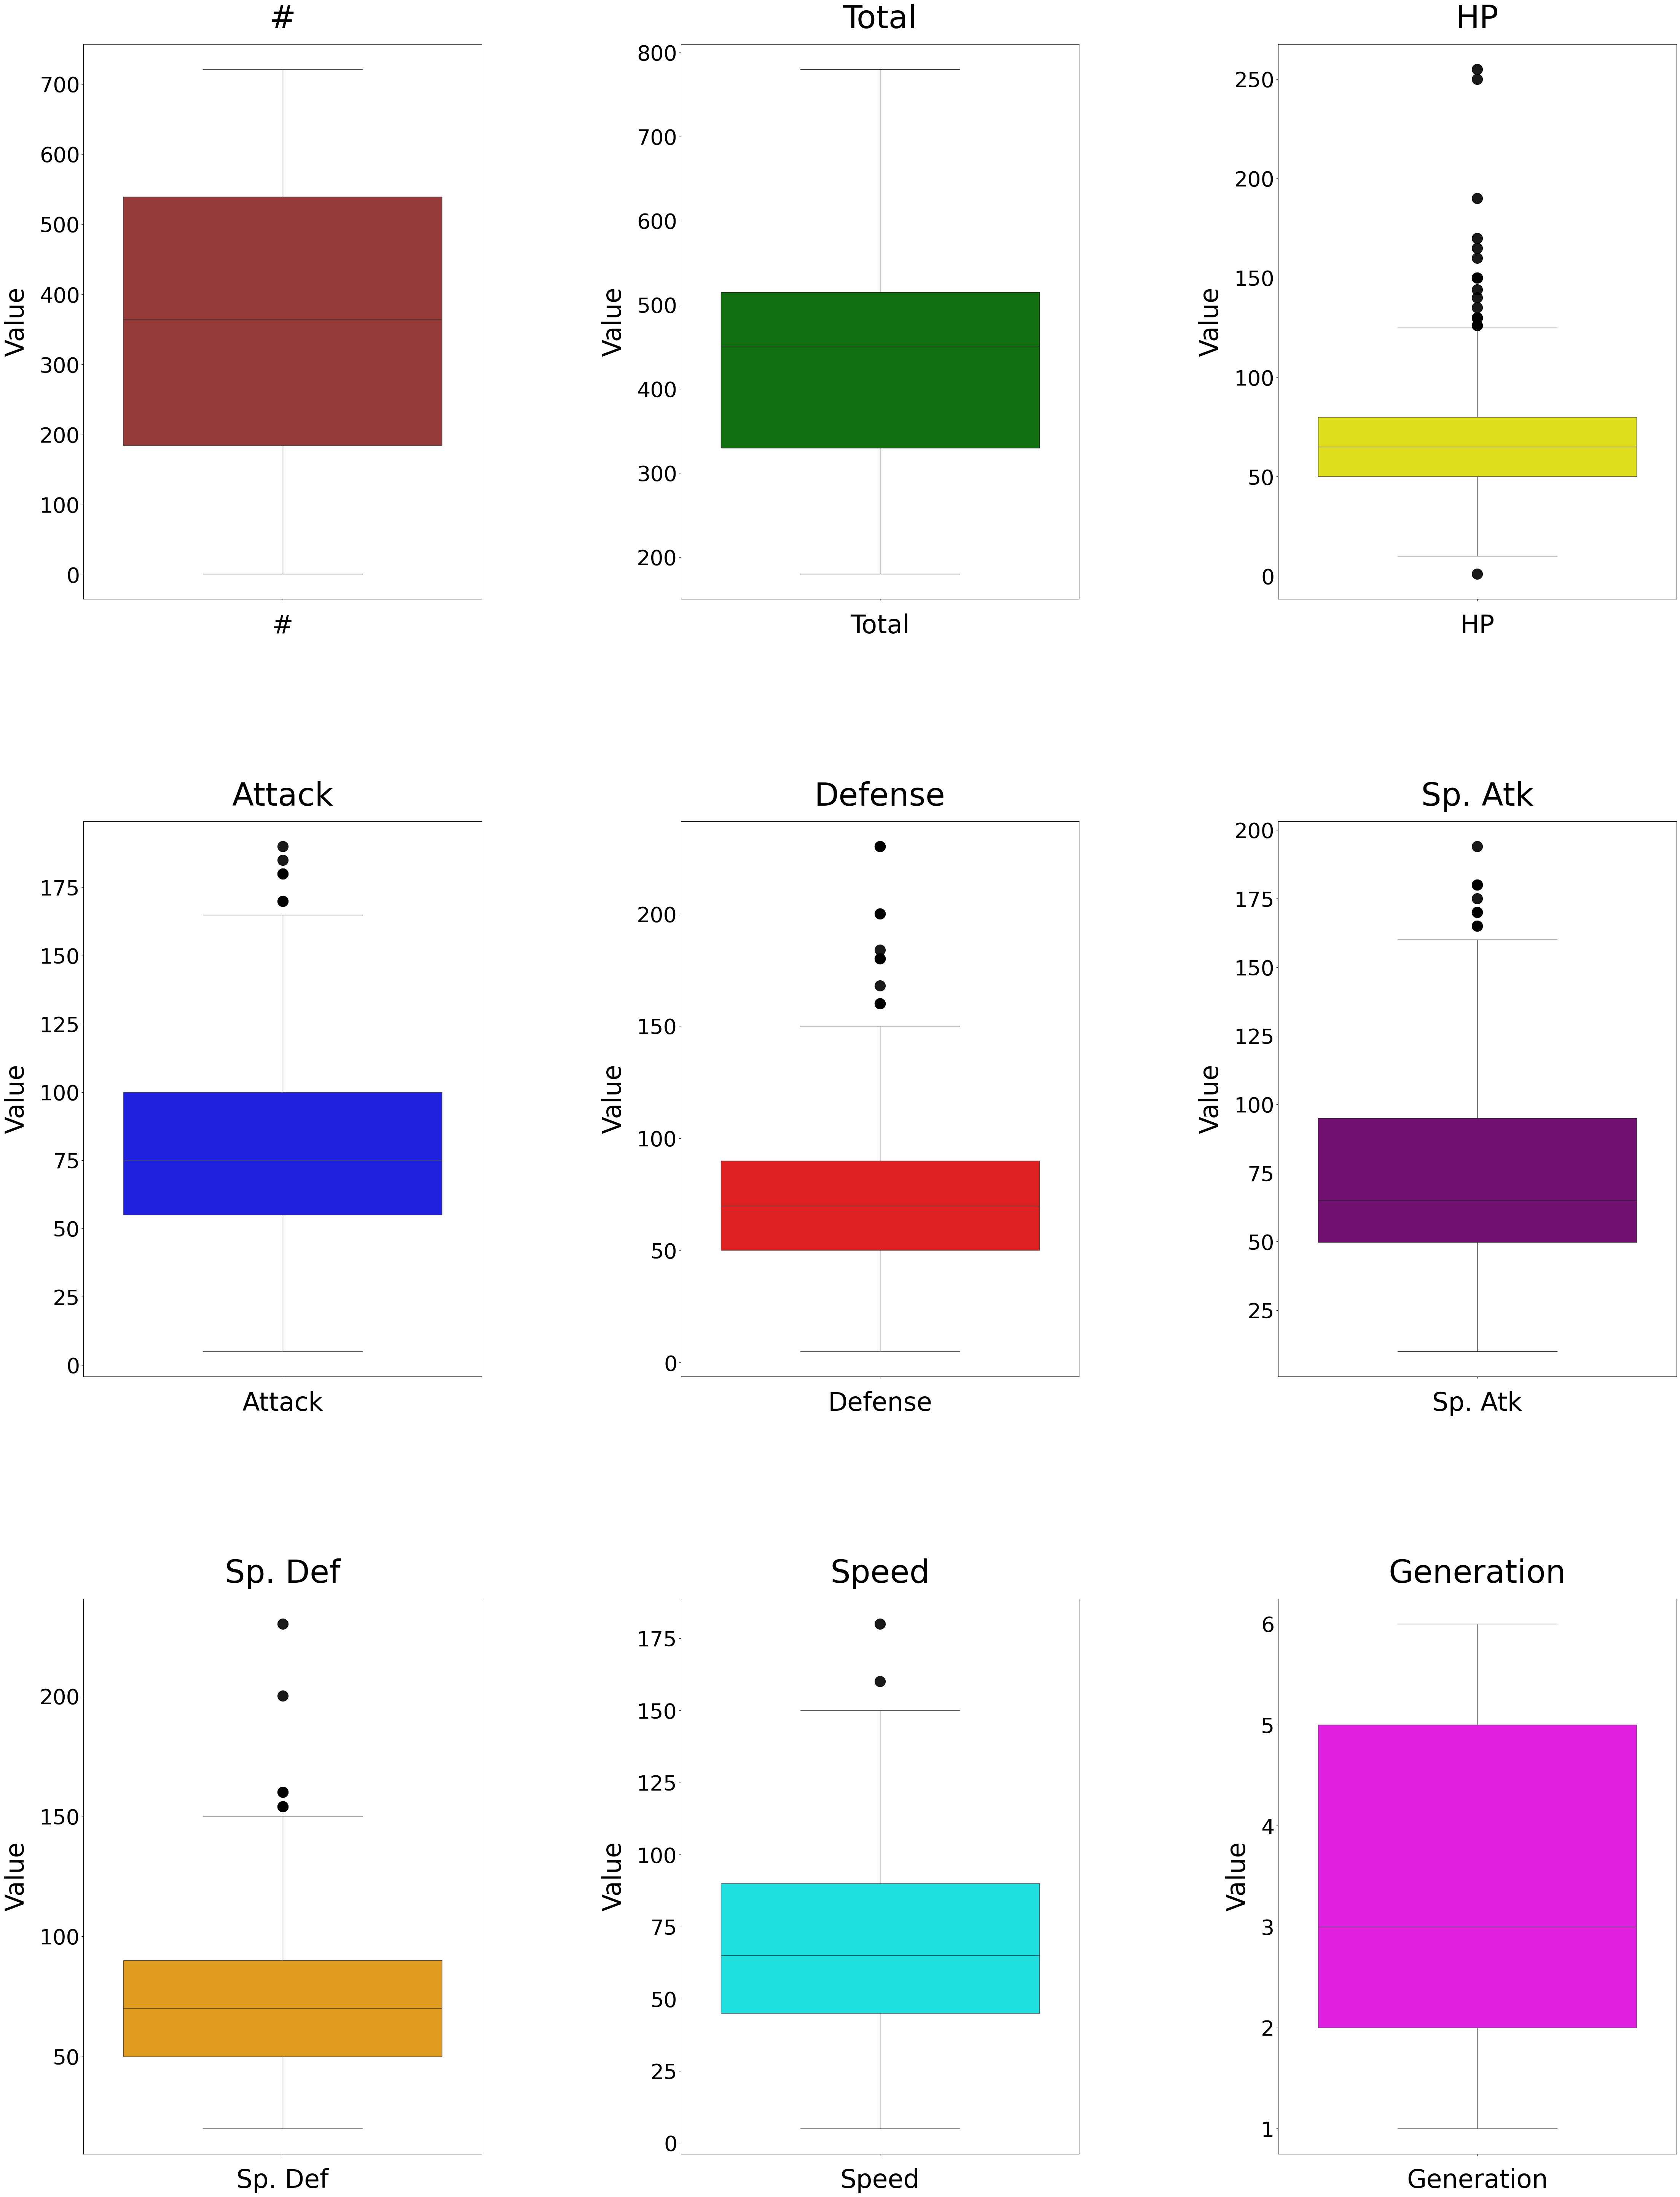

In [ ]:
#Creating boxplots for each numeric column in the dataset

# Select all numeric columns from the dataframe
numeric_cols = df.select_dtypes(include='number').columns
num_plots = len(numeric_cols)

# Set the number of subplots per row
cols_per_row = 3
nrows = (num_plots + cols_per_row - 1) // cols_per_row  # Calculate required rows

# Create subplots with increased figure size for better visibility
fig, ax = plt.subplots(nrows, cols_per_row, figsize=(18 * cols_per_row, 24 * nrows))
ax = ax.flatten()  # Flatten the axes array for easy iteration

# Define a list of colors for the boxplots
colors = ['brown', 'green', 'yellow', 'blue', 'red', 'purple', 'orange', 'cyan', 'magenta', 'gray']

# Define properties for outlier markers in the boxplots
flierprops = dict(marker='o', markerfacecolor='black', markeredgecolor='black', markersize=20, alpha=0.9)

# Draw a boxplot for each numeric column
for i, col in enumerate(numeric_cols):
    sns.boxplot(
        data=df[col],
        ax=ax[i],
        color=colors[i % len(colors)],
        flierprops=flierprops
    )
    ax[i].set_title(col, fontsize=60, pad=30)
    ax[i].set_xlabel(col, fontsize=48, labelpad=20)
    ax[i].set_ylabel('Value', fontsize=48, labelpad=20)
    ax[i].set_xticklabels([])  # Hide x-tick labels
    ax[i].tick_params(axis='y', labelsize=40)  # Set y-tick label size

# Hide any unused subplots
for j in range(i + 1, len(ax)):
    ax[j].set_visible(False)

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.5, hspace=0.4)
plt.show()

# I am not deleting any outliers, as they are important for the analysis. I will only remove some unnecessary columns

In [ ]:
# Drop columns from a DataFrame

df.drop(['#', 'Legendary', 'Generation'], axis=1, inplace=True)
df.head()
# these columns don't add much value to the analysis, so I will drop them

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80
4,Charmander,Fire,NaN,309,39,52,43,60,50,65


In [44]:
# Renaming column names for consistency
df.rename(columns={'Type 1': 'Type_1', 'Type 2': 'Type_2','HP': 'Hit_points'}, inplace=True)
print(df)

                      Name   Type_1  Type_2  Total  Hit_points  Attack  \
0                Bulbasaur    Grass  Poison    318          45      49   
1                  Ivysaur    Grass  Poison    405          60      62   
2                 Venusaur    Grass  Poison    525          80      82   
3    VenusaurMega Venusaur    Grass  Poison    625          80     100   
4               Charmander     Fire     NaN    309          39      52   
..                     ...      ...     ...    ...         ...     ...   
795                Diancie     Rock   Fairy    600          50     100   
796    DiancieMega Diancie     Rock   Fairy    700          50     160   
797    HoopaHoopa Confined  Psychic   Ghost    600          80     110   
798     HoopaHoopa Unbound  Psychic    Dark    680          80     160   
799              Volcanion     Fire   Water    600          80     110   

     Defense  Sp. Atk  Sp. Def  Speed  
0         49       65       65     45  
1         63       80       80 

In [45]:
# Renaming column names for consistency
df.rename(columns={'Sp. Atk': 'Special_attack', 'Sp. Def': 'Special_defense'}, inplace=True)
print(df)

                      Name   Type_1  Type_2  Total  Hit_points  Attack  \
0                Bulbasaur    Grass  Poison    318          45      49   
1                  Ivysaur    Grass  Poison    405          60      62   
2                 Venusaur    Grass  Poison    525          80      82   
3    VenusaurMega Venusaur    Grass  Poison    625          80     100   
4               Charmander     Fire     NaN    309          39      52   
..                     ...      ...     ...    ...         ...     ...   
795                Diancie     Rock   Fairy    600          50     100   
796    DiancieMega Diancie     Rock   Fairy    700          50     160   
797    HoopaHoopa Confined  Psychic   Ghost    600          80     110   
798     HoopaHoopa Unbound  Psychic    Dark    680          80     160   
799              Volcanion     Fire   Water    600          80     110   

     Defense  Special_attack  Special_defense  Speed  
0         49              65               65     45  
1

In [47]:
# Create a new column "Has Type 2": 1 if Type_2 has a value, 0 otherwise
df['Has Type 2'] = df['Type_2'].notna().astype(int)
df

,Name,Type_1,Type_2,Total,Hit_points,Attack,Defense,Special_attack,Special_defense,Speed,Has Type 2
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,0
...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,600,50,100,150,100,150,50,1
796,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,1
797,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,1
798,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,1


In [ ]:
# Compare if the sum of the stats equals the 'Total' column for the first row
row = df.iloc[0]
stat_sum = row['Hit_points'] + row['Attack'] + row['Defense'] + row['Special_attack'] + row['Special_defense'] + row['Speed']
print(f"Sum of stats: {stat_sum}")
print(f"Total column: {row['Total']}")
print("Do they match?", stat_sum == row['Total'])

#The total column is the sum of all stats, this is important for the combat dataset to see who the winner is.

Sum of stats: 318
Total column: 318
Do they match? True


In [51]:
# Renaming column names for consistency
df.rename(columns={'Has Type 2': 'Has_type_2'}, inplace=True)
print(df)

                      Name   Type_1  Type_2  Total  Hit_points  Attack  \
0                Bulbasaur    Grass  Poison    318          45      49   
1                  Ivysaur    Grass  Poison    405          60      62   
2                 Venusaur    Grass  Poison    525          80      82   
3    VenusaurMega Venusaur    Grass  Poison    625          80     100   
4               Charmander     Fire     NaN    309          39      52   
..                     ...      ...     ...    ...         ...     ...   
795                Diancie     Rock   Fairy    600          50     100   
796    DiancieMega Diancie     Rock   Fairy    700          50     160   
797    HoopaHoopa Confined  Psychic   Ghost    600          80     110   
798     HoopaHoopa Unbound  Psychic    Dark    680          80     160   
799              Volcanion     Fire   Water    600          80     110   

     Defense  Special_attack  Special_defense  Speed  Has_type_2  
0         49              65               6

In [59]:
#Testing for null values in the DataFrame after encoding Type 2 into a new column "Has Type 2"
df.isnull()
df.isnull().sum()
# I will leave Type_2 as it is, as 

Name                 0
Type_1               0
Type_2             386
Total                0
Hit_points           0
Attack               0
Defense              0
Special_attack       0
Special_defense      0
Speed                0
Has_type_2           0
dtype: int64

In [63]:
#filling null values with 'None' is a good way to handle it, as it indicates that the pokemon does not have a second type.
df['Type_2'].fillna('None', inplace=True)
df

,Name,Type_1,Type_2,Total,Hit_points,Attack,Defense,Special_attack,Special_defense,Speed,Has_type_2
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,True
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,True
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,True
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,True
4,Charmander,Fire,None,309,39,52,43,60,50,65,False
...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,600,50,100,150,100,150,50,True
796,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,True
797,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,True
798,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,True


In [ ]:
#testing null values
df.isnull()
df.isnull().sum()
# all null values have been cleared

Name               0
Type_1             0
Type_2             0
Total              0
Hit_points         0
Attack             0
Defense            0
Special_attack     0
Special_defense    0
Speed              0
Has_type_2         0
dtype: int64

In [60]:
# Convert 'Has Type 2' column to boolean data type
df['Has_type_2'] = df['Has_type_2'].astype(bool)

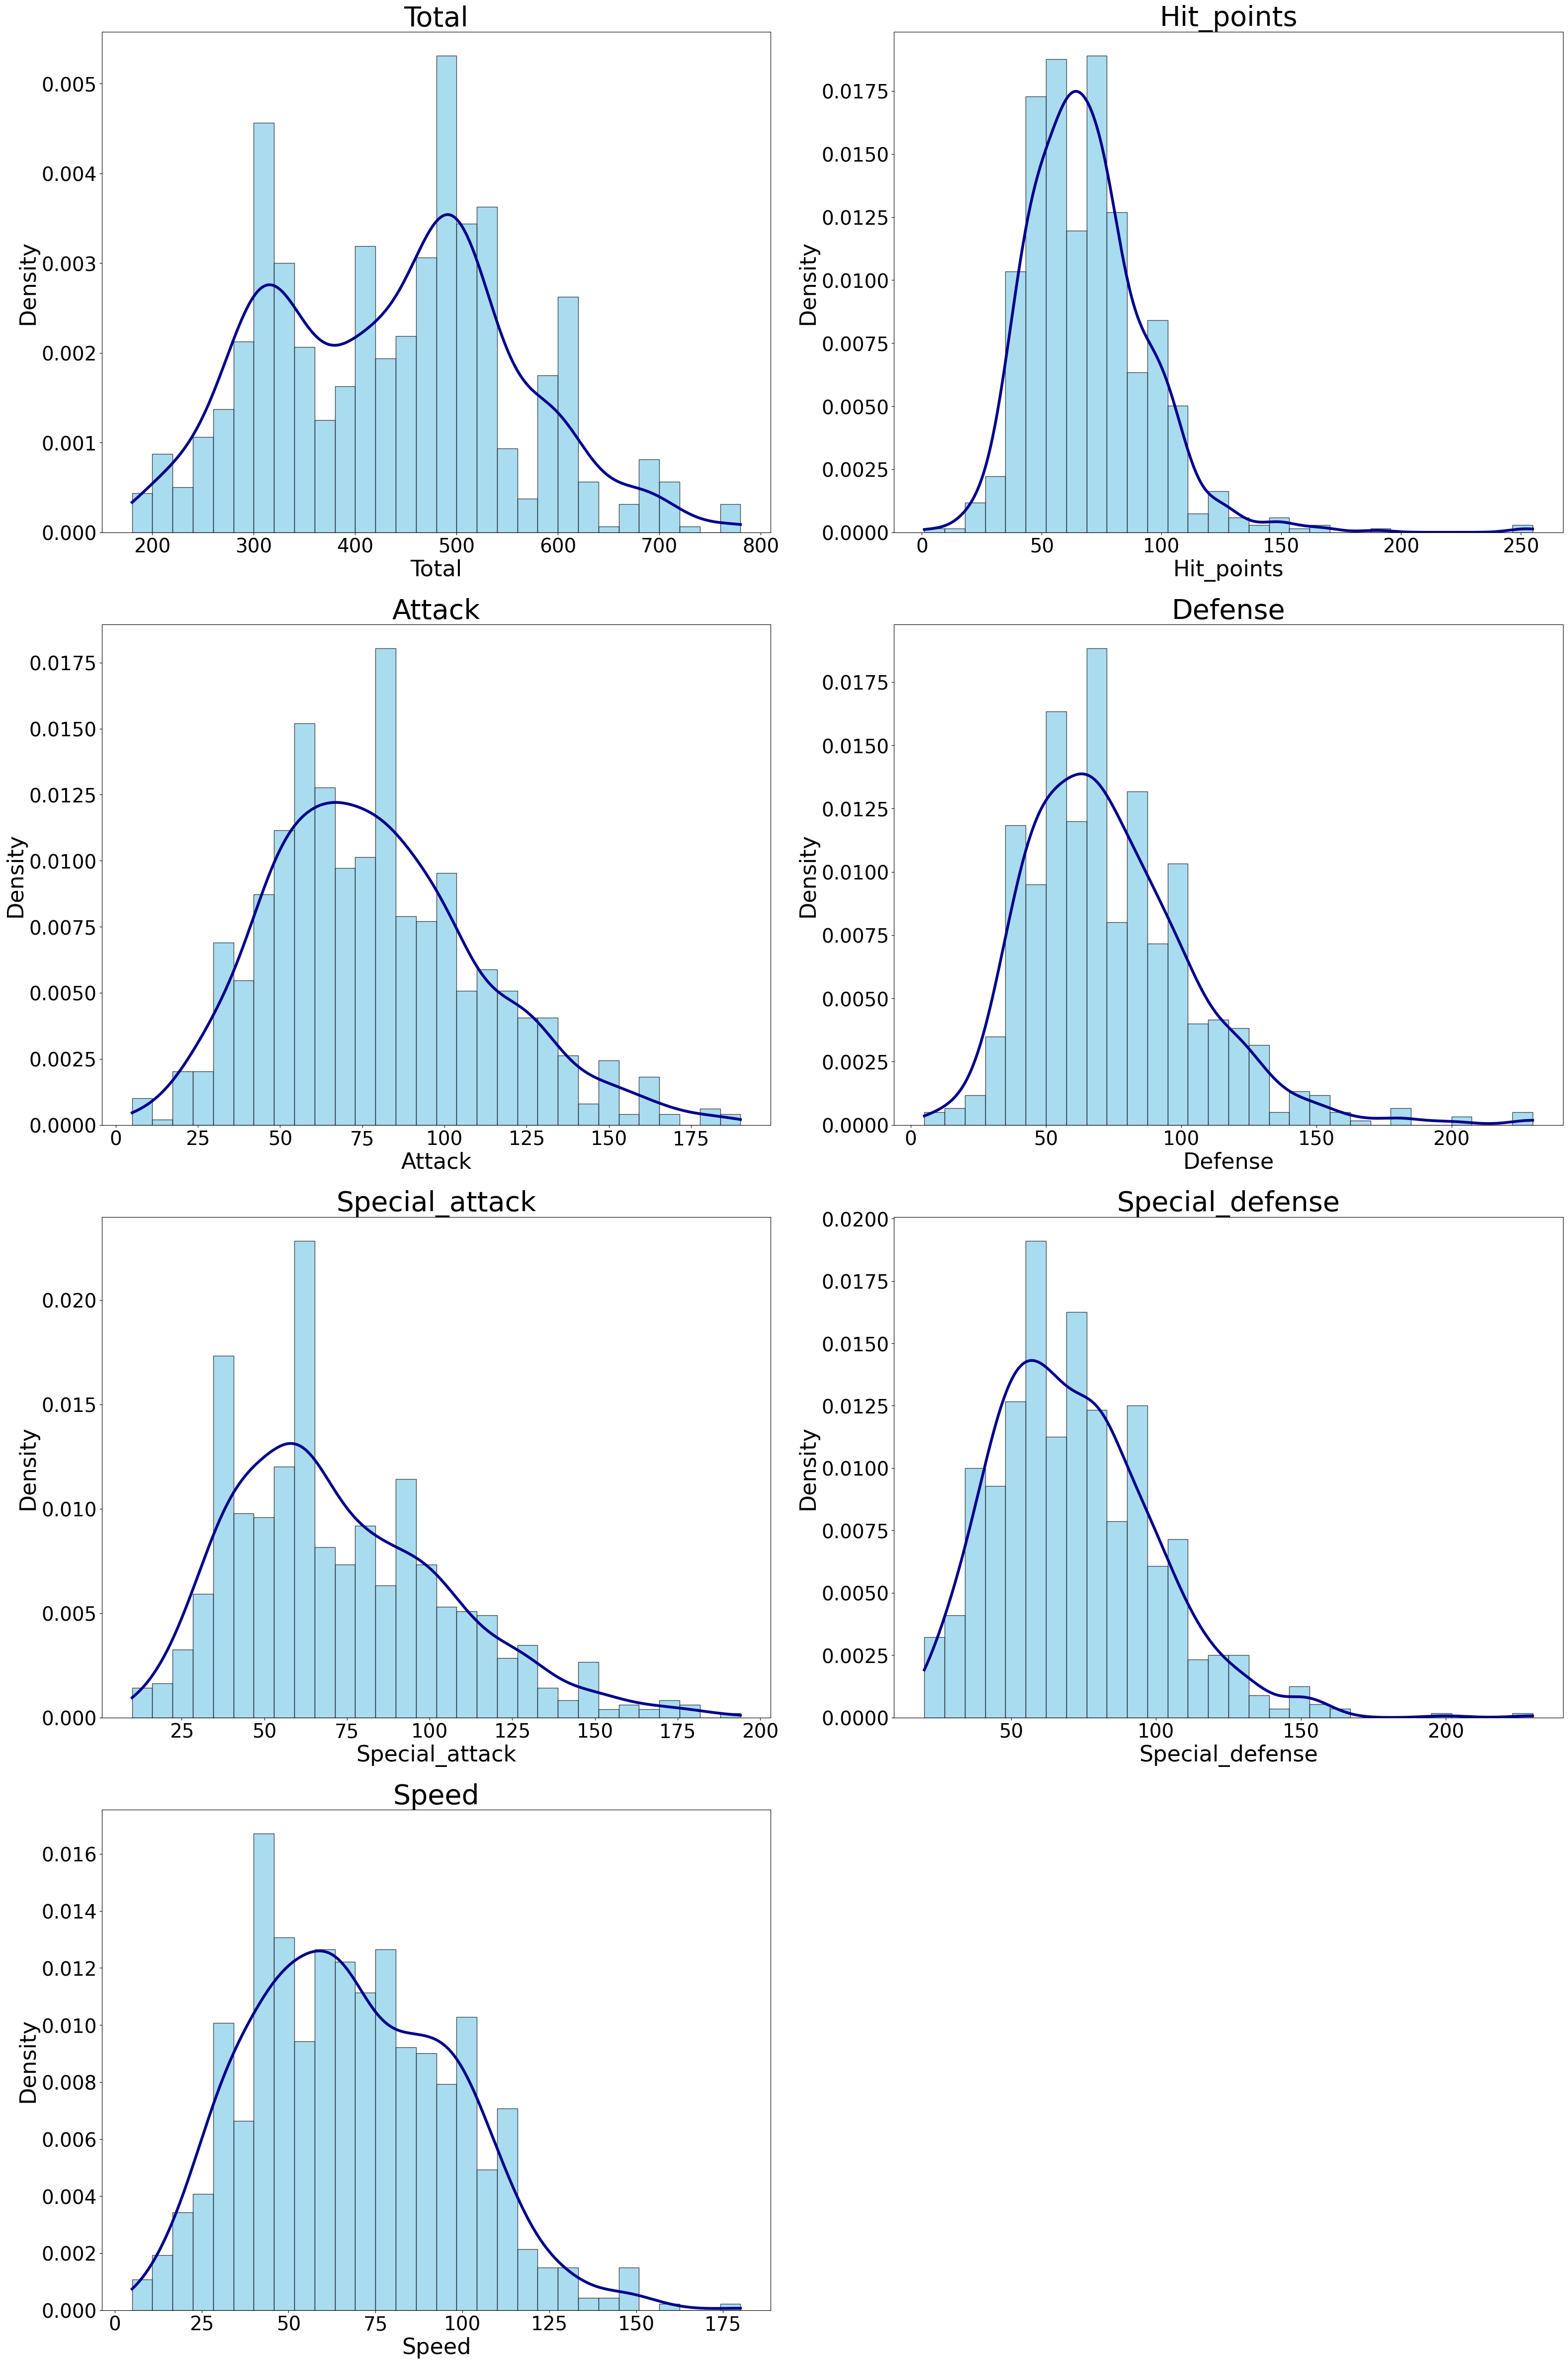

In [ ]:
# Select numeric columns
numeric_cols = df.select_dtypes(include='number').columns
num_plots = len(numeric_cols)

# Set 2 subplots per row for readability
cols_per_row = 2
nrows = (num_plots + cols_per_row - 1) // cols_per_row

fig, axes = plt.subplots(nrows, cols_per_row, figsize=(16 * cols_per_row, 12 * nrows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    data = df[col].dropna()
    axes[i].hist(data, bins=30, color='skyblue', edgecolor='black', alpha=0.7, density=True)
    # KDE plot in dark blue
    if len(data) > 1:
        kde = gaussian_kde(data)
        x_vals = np.linspace(data.min(), data.max(), 500)
        axes[i].plot(x_vals, kde(x_vals), color='darkblue', linewidth=4)
    axes[i].set_title(col, fontsize=40)
    axes[i].set_xlabel(col, fontsize=32)
    axes[i].set_ylabel('Density', fontsize=32)
    axes[i].tick_params(axis='both', labelsize=28)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

# Summary:
# The histograms and KDE plots above show the distribution of each numeric feature in the Pokemon dataset.
# Most distributions (such as Attack, Defense, Special_attack, Special_defense, and Speed) are right-skewed, 
# indicating that most Pokemon have lower values with a few having very high stats.
# The 'Total' stat is also right-skewed, reflecting that only a small number of Pokemon have very high total stats.
# 'Hit_points' (HP) shows a moderate right skew as well.
# None of the distributions are perfectly normal; all exhibit some degree of skewness, with long tails toward higher values.

In [ ]:
#Load Data to "Dataset/cleaned":
#df.to_csv('../Dataset/cleaned/pokemon_cleaned.csv', index=False)

In [5]:
#Investigation Combats Dataset
#  Initial Inspection
print(f"Initial shape:", df_combats.shape)
print(df_combats.head())

Initial shape: (50000, 3)
   First_pokemon  Second_pokemon  Winner
0            266             298     298
1            702             701     701
2            191             668     668
3            237             683     683
4            151             231     151


In [6]:
print("Checking the DataFrame info of Combats Dataset:") 
df_combats.info()
#this is not my main dataset, it is a dataset I will use to train the model. 
# I will do a left join using this table to provide more information in my table.

Checking the DataFrame info of Combats Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   First_pokemon   50000 non-null  int64
 1   Second_pokemon  50000 non-null  int64
 2   Winner          50000 non-null  int64
dtypes: int64(3)
memory usage: 1.1 MB


In [7]:
df_combats.describe(include=[np.number])

,First_pokemon,Second_pokemon,Winner
count,50000.000000,50000.000000,50000.000000
mean,400.495640,403.159660,408.890100
std,229.549429,230.083644,231.159961
min,1.000000,1.000000,1.000000
25%,203.000000,207.000000,206.000000
50%,399.000000,402.000000,422.000000
75%,597.250000,602.000000,606.000000
max,800.000000,800.000000,800.000000


In [8]:
# Check total null valuesif values in dataframe  
df_combats.isnull()
df_combats.isnull().sum()
# no null values existing

First_pokemon     0
Second_pokemon    0
Winner            0
dtype: int64

In [9]:
# Identify duplicate rows
duplicates = df_combats[df_combats.duplicated()]
print("Duplicate Rows:")
print(duplicates)

Duplicate Rows:
       First_pokemon  Second_pokemon  Winner
1238             654             164     654
1873             454             469     469
1907             520             184     184
2019             494             384     494
2481             720             243     720
...              ...             ...     ...
49960            376              36      36
49964            605             568     568
49967             15             667     667
49972            194             117     194
49997            303             368     368

[1952 rows x 3 columns]


In [ ]:

# Drop duplicate rows from the Combats DataFrame, if any exist
df_combats.drop_duplicates(inplace=True)

# Check for any remaining duplicate rows after dropping
duplicates = df_combats[df_combats.duplicated()]
print("Duplicate Rows:")
print(duplicates)

Duplicate Rows:
Empty DataFrame
Columns: [First_pokemon, Second_pokemon, Winner]
Index: []


In [ ]:
#Load Data to "Dataset/cleaned":
#df_combats.to_csv('../Dataset/cleaned/combats_cleaned.csv', index=False)